In [1]:
import numpy as np
import imageio
import cv2
import glob

# Parameters
height, width, channels = 256, 256, 3

# Prepare ISIC 2018 data set
Dataset_add = '/kaggle/input/isic2018-challenge-task1-data-segmentation/'
Tr_add = 'ISIC2018_Task1-2_Training_Input'

Tr_list = glob.glob(Dataset_add + Tr_add + '/*.jpg')
Data_train_2018 = np.zeros([len(Tr_list), height, width, channels])
Label_train_2018 = np.zeros([len(Tr_list), height, width])

print('Reading ISIC 2018')
for idx, img_path in enumerate(Tr_list):
    print(idx + 1)
    img = imageio.imread(img_path)
    img = cv2.resize(img, (width, height))
    Data_train_2018[idx] = img

    # Extract corresponding mask path
    img_name = img_path.split('/')[-1].replace('.jpg', '_segmentation.png')
    mask_path = Dataset_add + 'ISIC2018_Task1_Training_GroundTruth/' + img_name
    
    img2 = imageio.imread(mask_path)
    img2 = cv2.resize(img2, (width, height))
    Label_train_2018[idx] = img2 
         
print('Reading ISIC 2018 finished')

# Split the data
Train_img, Validation_img, Test_img = np.split(Data_train_2018, [1815, 1815 + 259])
Train_mask, Validation_mask, Test_mask = np.split(Label_train_2018, [1815, 1815 + 259])

# Save the data
np.save('data_train', Train_img)
np.save('data_test', Test_img)
np.save('data_val', Validation_img)

np.save('mask_train', Train_mask)
np.save('mask_test', Test_mask)
np.save('mask_val', Validation_mask)




Reading ISIC 2018
1


/tmp/ipykernel_35/3165878712.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)
/tmp/ipykernel_35/3165878712.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = imageio.imread(mask_path)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

convert masks in to binary format save them as in a new nympy array 

In [2]:
import numpy as np

# Load masks
train_masks = np.load('mask_train.npy')
val_masks = np.load('mask_val.npy')
test_masks = np.load('mask_test.npy')

# Ensure masks are binary (thresholding)
train_masks = (train_masks > 0.5).astype(np.uint8)
val_masks = (val_masks > 0.5).astype(np.uint8)
test_masks = (test_masks > 0.5).astype(np.uint8)

# Save the processed binary masks
np.save('mask_train_binary.npy', train_masks)
np.save('mask_val_binary.npy', val_masks)
np.save('mask_test_binary.npy', test_masks)

print("Masks have been successfully binarized and saved.")


Masks have been successfully binarized and saved.


normalize images from 0-255 to 0-1 and covert float32 and save them in new numpy array(normalized)

In [3]:
import numpy as np

# Load the original images and masks (in 0-255 format)
train_images = np.load('data_train.npy')
val_images = np.load('data_val.npy')
test_images = np.load('data_test.npy')

# Normalize the images by dividing by 255 (convert to float32)
train_images_normalized = train_images.astype(np.float32) / 255.0
val_images_normalized = val_images.astype(np.float32) / 255.0
test_images_normalized = test_images.astype(np.float32) / 255.0

# Save the normalized numpy arrays to new files
np.save('data_train_normalized.npy', train_images_normalized)
np.save('data_val_normalized.npy', val_images_normalized)
np.save('data_test_normalized.npy', test_images_normalized)

print("Normalization and saving completed.")


Normalization and saving completed.


normalizing way two same as that of the paper

veryfing masks are binary and printing sample data

Train Images Shape:  (1815, 256, 256, 3)
Train Masks Shape:  (1815, 256, 256)
Validation Images Shape:  (259, 256, 256, 3)
Validation Masks Shape:  (259, 256, 256)
Test Images Shape:  (520, 256, 256, 3)
Test Masks Shape:  (520, 256, 256)


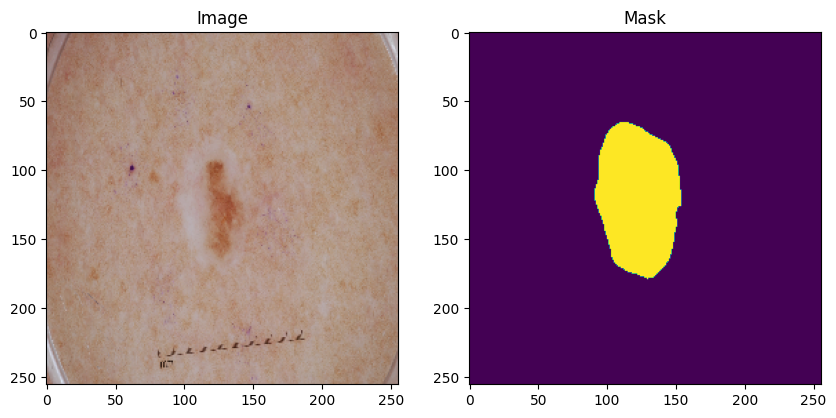

Dataset verification completed successfully.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the binary masks
train_images = np.load('data_train_normalized.npy')
train_masks = np.load('mask_train_binary.npy')
val_images = np.load('data_val_normalized.npy')
val_masks = np.load('mask_val_binary.npy')
test_images = np.load('data_test_normalized.npy')
test_masks = np.load('mask_test_binary.npy')

# Check shapes
print("Train Images Shape: ", train_images.shape)
print("Train Masks Shape: ", train_masks.shape)
print("Validation Images Shape: ", val_images.shape)
print("Validation Masks Shape: ", val_masks.shape)
print("Test Images Shape: ", test_images.shape)
print("Test Masks Shape: ", test_masks.shape)

# Visualize a few samples to check if the images and masks are correct
def display_sample(images, masks, index):
    """Displays an image and its corresponding mask."""
    image = images[index]
    mask = masks[index]

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image)
    ax[0].set_title('Image')
    ax[1].imshow(mask)
    ax[1].set_title('Mask')
    plt.show()

# Display a random training sample
display_sample(train_images, train_masks, index=0)

# Check that masks are binary
assert np.array_equal(np.unique(train_masks), [0, 1]), "Train masks are not binary!"
assert np.array_equal(np.unique(val_masks), [0, 1]), "Validation masks are not binary!"
assert np.array_equal(np.unique(test_masks), [0, 1]), "Test masks are not binary!"

print("Dataset verification completed successfully.")


In [5]:
# Check min and max values of the images
print("Min pixel value in training images:", np.min(train_images))
print("Max pixel value in training images:", np.max(train_images))

# Check min and max values of a specific image
sample_image = train_images[0]
print("Min pixel value in sample image:", np.min(sample_image))
print("Max pixel value in sample image:", np.max(sample_image))


Min pixel value in training images: 0.0
Max pixel value in training images: 1.0
Min pixel value in sample image: 0.02745098
Max pixel value in sample image: 0.9607843


In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0 = all logs, 1 = filter info, 2 = filter warnings, 3 = filter errors
import tensorflow as tf
#to supress warnings 

2025-05-19 10:44:27.885975: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747651468.127151      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747651468.192361      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [27]:

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import *

def squeeze_excite_block(inputs, ratio=8):
    init = inputs
    channel_axis = -1
    filters = init.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    x = Multiply()([init, se])
    return x

def conv_block(inputs, filters):
    x = inputs

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = squeeze_excite_block(x)

    return x

def encoder1(inputs):
    skip_connections = []

    model = VGG19(include_top=False, weights='imagenet', input_tensor=inputs)
    names = ["block1_conv2", "block2_conv2", "block3_conv4", "block4_conv4"]
    for name in names:
        skip_connections.append(model.get_layer(name).output)

    output = model.get_layer("block5_conv4").output
    return output, skip_connections

def decoder1(inputs, skip_connections):
    num_filters = [256, 128, 64, 32]
    skip_connections.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_connections[i]])
        x = conv_block(x, f)

    return x

# def encoder2(inputs):
#     skip_connections = []
#
#     output = DenseNet121(include_top=False, weights='imagenet')(inputs)
#     model = tf.keras.models.Model(inputs, output)
#
#     names = ["input_2", "conv1/relu", "pool2_conv", "pool3_conv"]
#     for name in names:
#         skip_connections.append(model.get_layer(name).output)
#     output = model.get_layer("pool4_conv").output
#
#     return output, skip_connections

def encoder2(inputs):
    num_filters = [32, 64, 128, 256]
    skip_connections = []
    x = inputs

    for i, f in enumerate(num_filters):
        x = conv_block(x, f)
        skip_connections.append(x)
        x = MaxPool2D((2, 2))(x)

    return x, skip_connections

def decoder2(inputs, skip_1, skip_2):
    num_filters = [256, 128, 64, 32]
    skip_2.reverse()
    x = inputs

    for i, f in enumerate(num_filters):
        x = UpSampling2D((2, 2), interpolation='bilinear')(x)
        x = Concatenate()([x, skip_1[i], skip_2[i]])
        x = conv_block(x, f)

    return x

def output_block(inputs):
    x = Conv2D(1, (1, 1), padding="same")(inputs)
    x = Activation('sigmoid')(x)
    return x

def Upsample(tensor, size):
    """Bilinear upsampling"""
    def _upsample(x, size):
        return tf.image.resize(images=x, size=size)
    return Lambda(lambda x: _upsample(x, size), output_shape=size)(tensor)

def ASPP(x, filter):
    shape = x.shape

    y1 = AveragePooling2D(pool_size=(shape[1], shape[2]))(x)
    y1 = Conv2D(filter, 1, padding="same")(y1)
    y1 = BatchNormalization()(y1)
    y1 = Activation("relu")(y1)
    y1 = UpSampling2D((shape[1], shape[2]), interpolation='bilinear')(y1)

    y2 = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(x)
    y2 = BatchNormalization()(y2)
    y2 = Activation("relu")(y2)

    y3 = Conv2D(filter, 3, dilation_rate=6, padding="same", use_bias=False)(x)
    y3 = BatchNormalization()(y3)
    y3 = Activation("relu")(y3)

    y4 = Conv2D(filter, 3, dilation_rate=12, padding="same", use_bias=False)(x)
    y4 = BatchNormalization()(y4)
    y4 = Activation("relu")(y4)

    y5 = Conv2D(filter, 3, dilation_rate=18, padding="same", use_bias=False)(x)
    y5 = BatchNormalization()(y5)
    y5 = Activation("relu")(y5)

    y = Concatenate()([y1, y2, y3, y4, y5])

    y = Conv2D(filter, 1, dilation_rate=1, padding="same", use_bias=False)(y)
    y = BatchNormalization()(y)
    y = Activation("relu")(y)

    return y

def build_model(shape):
    inputs = Input(shape)
    x, skip_1 = encoder1(inputs)
    x = ASPP(x, 64)
    x = decoder1(x, skip_1)
    outputs1 = output_block(x)

    x = inputs * outputs1

    x, skip_2 = encoder2(x)
    x = ASPP(x, 64)
    x = decoder2(x, skip_1, skip_2)
    outputs2 = output_block(x)
    x = Concatenate()([outputs1, outputs2])
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

    return model

if __name__ == "__main__":
    model = build_model((256, 256, 3))
    model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 256, 256, 64)   │          1,792 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 256, 256, 64)   │         36,928 │ block1_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 128, 128, 64)   │              0 │ block1_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv1 (Conv2D)     │ (None, 128, 128, 128)  │         73,856 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv2 (Conv2D)     │ (None, 128, 128, 128)  │        147,584 │ block2_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 64, 64, 128)    │              0 │ block2_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv1 (Conv2D)     │ (None, 64, 64, 256)    │        295,168 │ block2_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv2 (Conv2D)     │ (None, 64, 64, 256)    │        590,080 │ block3_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv3 (Conv2D)     │ (None, 64, 64, 256)    │        590,080 │ block3_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv4 (Conv2D)     │ (None, 64, 64, 256)    │        590,080 │ block3_conv3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_pool               │ (None, 32, 32, 256)    │              0 │ block3_conv4[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv1 (Conv2D)     │ (None, 32, 32, 512)    │      1,180,160 │ block3_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv2 (Conv2D)     │ (None, 32, 32, 512)    │      2,359,808 │ block4_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv3 (Conv2D)     │ (None, 32, 32, 512)    │      2,359,808 │ block4_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv4 (Conv2D)     │ (None, 32, 32, 512)    │      2,359,808 │ block4_conv3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_pool               │ (None, 16, 16, 512)    │              0 │ block4_conv4[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 29,297,573 (111.76 MB)

 Trainable params: 29,290,277 (111.73 MB)

 Non-trainable params: 7,296 (28.50 KB)

defining model unet 

In [9]:
import os
os.environ["XLA_FLAGS"] = "--xla_gpu_enable_slow_operation_alarm=false"


Train Images Shape:  (1815, 256, 256, 3)
Train Masks Shape:  (1815, 256, 256)
Validation Images Shape:  (259, 256, 256, 3)
Validation Masks Shape:  (259, 256, 256)
Test Images Shape:  (520, 256, 256, 3)
Test Masks Shape:  (520, 256, 256)


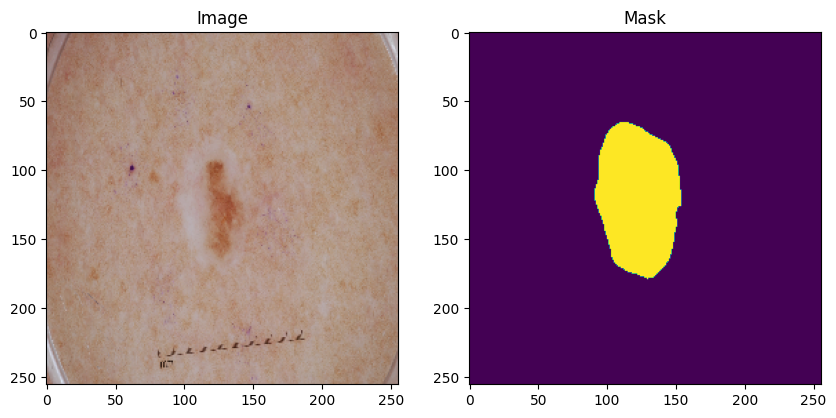

Dataset verification completed successfully.


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
train_images = np.load('data_train_normalized.npy')
train_masks = np.load('mask_train_binary.npy')
val_images = np.load('data_val_normalized.npy')
val_masks = np.load('mask_val_binary.npy')
test_images = np.load('data_test_normalized.npy')
test_masks = np.load('mask_test_binary.npy')

# Check shapes
print("Train Images Shape: ", train_images.shape)
print("Train Masks Shape: ", train_masks.shape)
print("Validation Images Shape: ", val_images.shape)
print("Validation Masks Shape: ", val_masks.shape)
print("Test Images Shape: ", test_images.shape)
print("Test Masks Shape: ", test_masks.shape)

# Ensure the image shape is (256, 256, 3) and the mask shape is (256, 256)
assert train_images.shape[1:] == (256, 256, 3), "Training images shape mismatch!"
assert train_masks.shape[1:] == (256, 256), "Training masks shape mismatch!"

# Visualize a few samples to check if the images and masks are correct
def display_sample(images, masks, index):
    """Displays an image and its corresponding mask."""
    image = images[index]
    mask = masks[index]


    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image)
    ax[0].set_title('Image')
    ax[1].imshow(mask)
    ax[1].set_title('Mask')
    plt.show()

# Display a random training sample
display_sample(train_images, train_masks, index=0)

# Check that masks are binary
assert np.array_equal(np.unique(train_masks), [0, 1]), "Train masks are not binary!"
assert np.array_equal(np.unique(val_masks), [0, 1]), "Validation masks are not binary!"
assert np.array_equal(np.unique(test_masks), [0, 1]), "Test masks are not binary!"

print("Dataset verification completed successfully.")


above is all preprocessing the dataset which already loaded in the datasets(input tab)

In [11]:
# Ensure that masks have shape (256, 256, 1)
train_masks = np.expand_dims(train_masks, axis=-1)
val_masks = np.expand_dims(val_masks, axis=-1)
test_masks = np.expand_dims(test_masks, axis=-1)

In [12]:

# Check shapes
print("Train Images Shape: ", train_images.shape)
print("Train Masks Shape: ", train_masks.shape)
print("Validation Images Shape: ", val_images.shape)
print("Validation Masks Shape: ", val_masks.shape)
print("Test Images Shape: ", test_images.shape)
print("Test Masks Shape: ", test_masks.shape)

Train Images Shape:  (1815, 256, 256, 3)
Train Masks Shape:  (1815, 256, 256, 1)
Validation Images Shape:  (259, 256, 256, 3)
Validation Masks Shape:  (259, 256, 256, 1)
Test Images Shape:  (520, 256, 256, 3)
Test Masks Shape:  (520, 256, 256, 1)


In [14]:
import os
os.environ["XLA_FLAGS"] = "--xla_gpu_enable_slow_operation_alarm=false"


train

In [28]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
# Instantiate the model
model = build_model(shape=(256, 256, 3))

# ModelCheckpoint to save the entire model (architecture + weights)
checkpoint = ModelCheckpoint('build_model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# ReduceLROnPlateau to reduce learning rate when validation loss plateaus
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

# EarlyStopping to stop training if validation loss doesn't improve for 10 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

# Train the model with the modified setup
history = model.fit(
    train_images, train_masks,
    validation_data=(val_images, val_masks),
    batch_size=8,
    epochs=50,
    shuffle=True,
    callbacks=[checkpoint, reduce_lr_loss, early_stopping],
    verbose=1
)


# Save the final trained model
model.save('build_model.keras')

print("Training completed successfully.")

Epoch 1/50


I0000 00:00:1747652975.669659     104 service.cc:148] XLA service 0x7993180032a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747652975.672140     104 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1747652975.672161     104 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1747652980.104830     104 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-19 11:10:29.459977: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,128,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,128,256,256]{3,2,1,0}, f32[8,32,256,256]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_qu

226/227 ━━━━━━━━━━━━━━━━━━━━ 0s 743ms/step - accuracy: 0.7019 - loss: 0.6346

E0000 00:00:1747653261.600659     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1747653261.844641     102 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-05-19 11:14:43.216726: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,160,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[7,160,256,256]{3,2,1,0}, f32[7,32,256,256]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-05-19 11:14:43.384

227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7025 - loss: 0.6344   
Epoch 1: val_loss improved from inf to 0.59210, saving model to build_model.keras
227/227 ━━━━━━━━━━━━━━━━━━━━ 401s 1s/step - accuracy: 0.7031 - loss: 0.6342 - val_accuracy: 0.8844 - val_loss: 0.5921 - learning_rate: 1.0000e-04
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 739ms/step - accuracy: 0.9218 - loss: 0.5295
Epoch 2: val_loss improved from 0.59210 to 0.54377, saving model to build_model.keras
227/227 ━━━━━━━━━━━━━━━━━━━━ 178s 784ms/step - accuracy: 0.9219 - loss: 0.5295 - val_accuracy: 0.9058 - val_loss: 0.5438 - learning_rate: 1.0000e-04
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 740ms/step - accuracy: 0.9346 - loss: 0.4870
Epoch 3: val_loss improved from 0.54377 to 0.50589, saving model to build_model.keras
227/227 ━━━━━━━━━━━━━━━━━━━━ 178s 784ms/step - accuracy: 0.9346 - loss: 0.4870 - val_accuracy: 0.9237 - val_loss: 0.5059 - learning_rate: 1.0000e-04
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 740ms/

In [29]:
import os
os.environ["XLA_FLAGS"] = "--xla_gpu_enable_slow_operation_alarm=false"


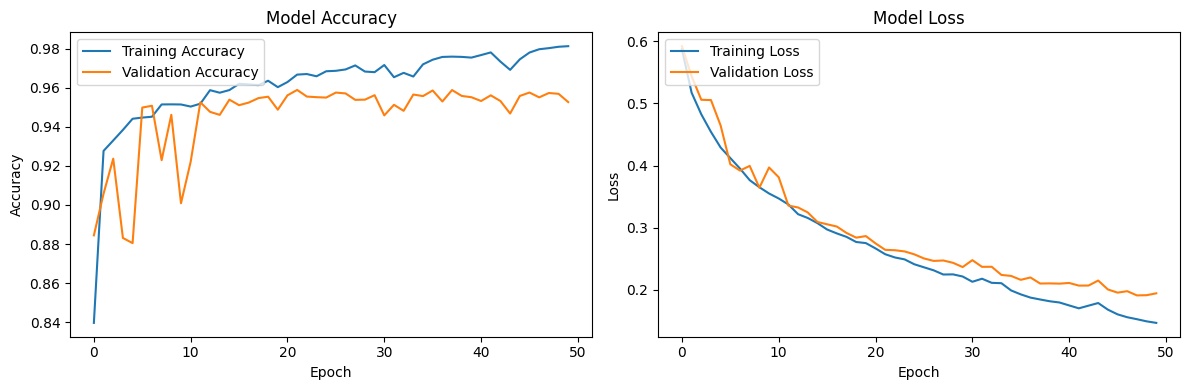

In [30]:
import matplotlib.pyplot as plt

# Function to plot training and validation metrics
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    # Subplot for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    
    # Subplot for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')
    
    # Display the plots
    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(history)


evaluation--matrixs

In [31]:
import numpy as np
from keras.models import load_model
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, confusion_matrix



# Load the trained model
model = load_model('build_model.keras')
    

# Make predictions on the test set
predictions = model.predict(test_images)

# Binarize predictions by applying a threshold of 0.5
predictions = (predictions > 0.5).astype(np.uint8)

# Flatten the masks and predictions for evaluation
test_masks_flat = test_masks.flatten()
predictions_flat = predictions.flatten()

# Calculate evaluation metrics
accuracy = accuracy_score(test_masks_flat, predictions_flat)
f1 = f1_score(test_masks_flat, predictions_flat)
iou = jaccard_score(test_masks_flat, predictions_flat)
conf_matrix = confusion_matrix(test_masks_flat, predictions_flat)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Jaccard Index (IoU): {iou:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


17/17 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step 
Accuracy: 0.9561
F1 Score: 0.9020
Jaccard Index (IoU): 0.8214
Confusion Matrix:
[[25709481   742815]
 [  751605  6874819]]


result --generated mask,true mask,image

In [1]:
import matplotlib.pyplot as plt

# Function to display a sample test image, predicted mask, and true mask
def display_test_sample(images, true_masks, predicted_masks, index):
    """Displays test image, true mask, and predicted mask side by side."""
    image = images[index]
    true_mask = true_masks[index]
    predicted_mask = predicted_masks[index]

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(image)
    ax[0].set_title('Test Image')

    ax[1].imshow(true_mask, cmap='gray')
    ax[1].set_title('True Mask')

    ax[2].imshow(predicted_mask, cmap='gray')
    ax[2].set_title('Predicted Mask')

    plt.show()

# Display a few test samples along with their true and predicted masks
for i in range(15):  # Display the first 3 samples
    display_test_sample(test_images, test_masks, predictions, i)


NameError: name 'test_images' is not defined

exact copy of the implemented in paper